# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [4]:
cities

['vao',
 'ugoofaaru',
 'ust-omchug',
 'uglich',
 'cap malheureux',
 'punta arenas',
 'rocha',
 'busselton',
 'corona',
 'taolanaro',
 'hermanus',
 'karaton',
 'castro',
 'ushuaia',
 'cape town',
 'butaritari',
 'pingdingshan',
 'baykit',
 'sentyabrskiy',
 'jiwani',
 'mataura',
 'port lincoln',
 'qaanaaq',
 'fortuna',
 'sitka',
 'cherskiy',
 'hovd',
 'arenapolis',
 'albany',
 'faanui',
 'nanortalik',
 'lompoc',
 'bambous virieux',
 'alyangula',
 'port blair',
 'rikitea',
 'ciudad bolivar',
 'ribeira grande',
 'hithadhoo',
 'tabiauea',
 'faya',
 'tasiilaq',
 'illoqqortoormiut',
 'tiksi',
 'iturama',
 'vila franca do campo',
 'anqiu',
 'norman wells',
 'maloshuyka',
 'bluff',
 'phan thiet',
 'berezovyy',
 'hobart',
 'aripuana',
 'bengkulu',
 'imeni zhelyabova',
 'kodiak',
 'ossora',
 'mahebourg',
 'avarua',
 'nanakuli',
 'longyearbyen',
 'antalaha',
 'riyadh',
 'port hedland',
 'atuona',
 'tiznit',
 'kruisfontein',
 'xai-xai',
 'floro',
 'halalo',
 'khatanga',
 'richards bay',
 'batticalo

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=04c02935047ea7246befcdb496e272f0&units=Imperial&q='

In [7]:

# set up lists to hold reponse info
date = []
lat = []
lon = []
city_name = []
country =[] 
temp = []
max_temp = []
clouds = []
windspeed = []
humidity = []
record_count = 1


# Loop through the list of cities and perform a request for data on each using Exeption handling

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        city_name.append(response['name']) 
        country.append(response['sys']['country'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        date.append(response['dt'])                        
        print(f'Processing records for record {record_count} in the city of: {city}')
        record_count += 1
        
    except :
        print('City not found')
    
    continue

# Communicate call complete
print(f"|*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-|")
print(f"Call Complete, Over and out")
print(f"|*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-|")

Processing records for record 1 in the city of: vao
Processing records for record 2 in the city of: ugoofaaru
Processing records for record 3 in the city of: ust-omchug
Processing records for record 4 in the city of: uglich
Processing records for record 5 in the city of: cap malheureux
Processing records for record 6 in the city of: punta arenas
Processing records for record 7 in the city of: rocha
Processing records for record 8 in the city of: busselton
Processing records for record 9 in the city of: corona
City not found
Processing records for record 10 in the city of: hermanus
Processing records for record 11 in the city of: karaton
Processing records for record 12 in the city of: castro
Processing records for record 13 in the city of: ushuaia
Processing records for record 14 in the city of: cape town
Processing records for record 15 in the city of: butaritari
Processing records for record 16 in the city of: pingdingshan
Processing records for record 17 in the city of: baykit
City 

Processing records for record 139 in the city of: sistranda
Processing records for record 140 in the city of: usinsk
Processing records for record 141 in the city of: ambilobe
Processing records for record 142 in the city of: marrakesh
Processing records for record 143 in the city of: kirsanov
City not found
Processing records for record 144 in the city of: kaitangata
Processing records for record 145 in the city of: obo
Processing records for record 146 in the city of: oeiras
Processing records for record 147 in the city of: lebu
Processing records for record 148 in the city of: lamar
Processing records for record 149 in the city of: gore
City not found
City not found
Processing records for record 150 in the city of: hilo
Processing records for record 151 in the city of: talnakh
City not found
Processing records for record 152 in the city of: ponta do sol
Processing records for record 153 in the city of: martapura
Processing records for record 154 in the city of: severo-kurilsk
Proces

Processing records for record 273 in the city of: brekstad
Processing records for record 274 in the city of: xining
Processing records for record 275 in the city of: yerofey pavlovich
Processing records for record 276 in the city of: turayf
Processing records for record 277 in the city of: nikolskoye
Processing records for record 278 in the city of: coquimbo
Processing records for record 279 in the city of: tessalit
Processing records for record 280 in the city of: port hardy
Processing records for record 281 in the city of: esil
Processing records for record 282 in the city of: hauterive
Processing records for record 283 in the city of: saiha
Processing records for record 284 in the city of: helsinki
Processing records for record 285 in the city of: skjervoy
Processing records for record 286 in the city of: panjab
Processing records for record 287 in the city of: jibuti
Processing records for record 288 in the city of: manga
Processing records for record 289 in the city of: novobirily

Processing records for record 414 in the city of: mineros
Processing records for record 415 in the city of: conceicao do araguaia
Processing records for record 416 in the city of: chapais
Processing records for record 417 in the city of: jalu
Processing records for record 418 in the city of: bowen
Processing records for record 419 in the city of: catamarca
Processing records for record 420 in the city of: nouadhibou
Processing records for record 421 in the city of: quatre cocos
Processing records for record 422 in the city of: nogliki
Processing records for record 423 in the city of: tombouctou
Processing records for record 424 in the city of: stornoway
Processing records for record 425 in the city of: anloga
City not found
Processing records for record 426 in the city of: vuktyl
Processing records for record 427 in the city of: mehamn
Processing records for record 428 in the city of: porbandar
Processing records for record 429 in the city of: wamba
Processing records for record 430 in

Processing records for record 548 in the city of: bayji
Processing records for record 549 in the city of: sorland
Processing records for record 550 in the city of: ratnagiri
Processing records for record 551 in the city of: manzhouli
Processing records for record 552 in the city of: seymchan
Processing records for record 553 in the city of: anshun
Processing records for record 554 in the city of: bendigo
Processing records for record 555 in the city of: sao felix do xingu
Processing records for record 556 in the city of: waitara
Processing records for record 557 in the city of: nampa
Processing records for record 558 in the city of: camocim
Processing records for record 559 in the city of: ucluelet
Processing records for record 560 in the city of: rostovka
Processing records for record 561 in the city of: paamiut
Processing records for record 562 in the city of: yaransk
Processing records for record 563 in the city of: hanover
|*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-|
Call Complete,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
Worldctyweather = {'City': city_name,
                   'Country': country,
                   'Temperature': temp,
                   'Latitude':lat,
                   'Longitude':lon,
                   'Max_Temp':max_temp,
                   'Cloudiness':clouds,
                   'Wind_Speed':windspeed,
                   'Humidity':humidity
                  }

Weatherdata_pd = pd.DataFrame(Worldctyweather)

len(Weatherdata_pd)


563

In [9]:
Weatherdata_pd.head(10)
Weatherdata_pd.to_csv("weatherdata.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
## No cities with humidity over 100.

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Weatherdata_pd[Weatherdata_pd["Humidity"] <= 100]
clean_city_data.head(10)



,City,Country,Temperature,Latitude,Longitude,Max_Temp,Cloudiness,Wind_Speed,Humidity
0,Vao,NC,73.15,-22.67,167.48,73.15,100,11.52,78
1,Ugoofaaru,MV,84.07,5.67,73.00,84.07,100,15.90,80
2,Ust'-Omchug,RU,36.63,61.15,149.63,36.63,99,2.59,83
3,Uglich,RU,40.89,57.53,38.33,40.89,100,2.75,97
4,Cap Malheureux,MU,69.01,-19.98,57.61,69.01,0,1.99,83
5,Punta Arenas,CL,42.39,-53.15,-70.92,42.80,90,10.29,93
6,Rocha,UY,56.16,-34.48,-54.33,56.16,67,10.60,59
7,Busselton,AU,60.03,-33.65,115.33,61.00,99,36.26,67
8,Corona,US,83.43,33.88,-117.57,87.80,1,8.05,42
9,Hermanus,ZA,59.00,-34.42,19.23,59.00,98,5.99,87


In [13]:
# Extract relevant fields from the data frame



# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

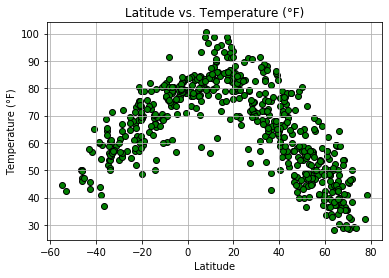

In [14]:
# Scatterplot of Lattitudue vs. Temp.
plt.scatter(clean_city_data['Latitude'], clean_city_data['Temperature'], marker="o", facecolors="green", edgecolors="black")

# Format the plot with titles and labels
plt.title("Latitude vs. Temperature (°F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsTemp.png")

# Show Plot
plt.show()


Latitude vs. Temperature seems to show a relationship.
As Latitude approaches 0 (equator), Temperature tends to increase.

## Latitude vs. Humidity Plot

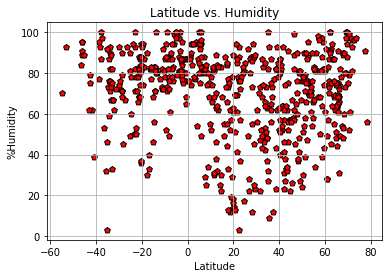

In [15]:
# Scatterplot of Lattitudue vs. Humidity.
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'], marker="p", facecolors="red", edgecolors="black")

# Format the plot with titles and labels
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("%Humidity")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()


The graph above shows a loose relationshipm between Latitude and Humidity. The relationship here is not as strong as that shown between temperature and Latitude. Humidity seems to increase as we approach Latitude 0.

## Latitude vs. Cloudiness Plot

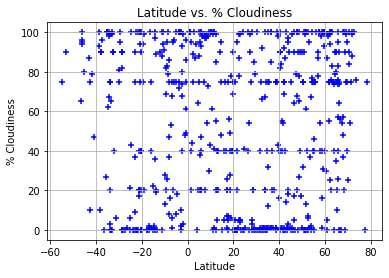

In [16]:
# Scatterplot of Lattitudue vs. Humidity.
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'], marker="+", facecolors="blue", edgecolors="black")

# Format the plot with titles and labels
plt.title("Latitude vs. % Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

The graph shown above shows no clear trend between Cloudiness and Latitude.

## Latitude vs. Wind Speed Plot

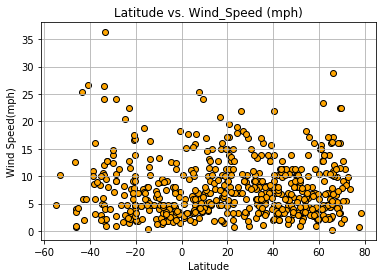

In [17]:
# Scatterplot of Lattitudue vs. Humidity.
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind_Speed'], marker="o", facecolors="orange", edgecolors="black")

# Format the plot with titles and labels
plt.title("Latitude vs. Wind_Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

The graph shown above shows no clear trend between Wind Speed and Latitude.

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
# Create Northern and Southern Hemisphere DataFrames

Northern_df = clean_city_data[clean_city_data['Latitude']>=0]
Southern_df = clean_city_data[clean_city_data['Latitude']<0]


                                   

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

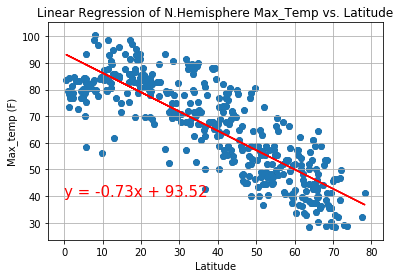

In [20]:
# Scatterplot of Max_temp vs. Latitude.
plt.scatter(Northern_df['Latitude'], Northern_df['Max_Temp'], marker="p", facecolors="blue", edgecolors="black")

#Generate Regression equation

x_values= Northern_df["Latitude"]
y_values= Northern_df["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show regression equation

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

# Format the plot with titles and labels
plt.title("Linear Regression of N.Hemisphere Max_Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max_temp (F)")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

As previously indicated we see an increase in temperature as Lattitued approaches 0.  A similar relationship is expeced in the s.Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

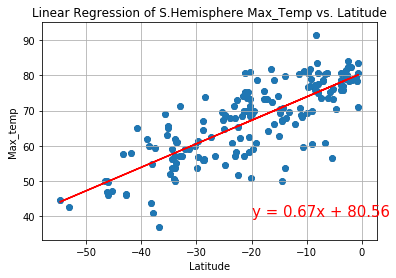

In [21]:
# Scatterplot of Max_temp vs. Latitude.
plt.scatter(Southern_df['Latitude'], Southern_df['Max_Temp'], marker="p", facecolors="orange", edgecolors="black")

#Generate Regression equation

x_values= Southern_df["Latitude"]
y_values= Southern_df["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show regression equation

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

# Format the plot with titles and labels
plt.title("Linear Regression of S.Hemisphere Max_Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max_temp")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

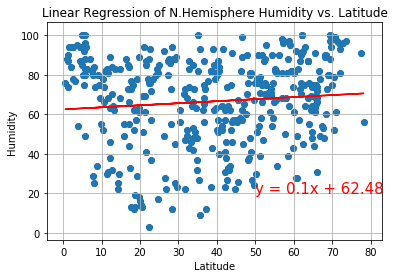

In [22]:
# Scatterplot of Humidity vs. Latitude.
plt.scatter(Northern_df['Latitude'], Northern_df['Humidity'], marker="p", facecolors="blue", edgecolors="black")

#Generate Regression equation

x_values= Northern_df["Latitude"]
y_values= Northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show regression equation

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Format the plot with titles and labels
plt.title("Linear Regression of N.Hemisphere Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

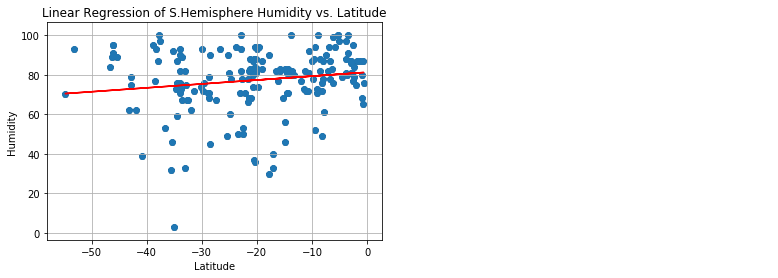

In [23]:
# Scatterplot of Max_temp vs. Latitude.
plt.scatter(Southern_df['Latitude'], Southern_df['Humidity'], marker="p", facecolors="blue", edgecolors="black")

#Generate Regression equation

x_values= Southern_df["Latitude"]
y_values= Southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show regression equation

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Format the plot with titles and labels
plt.title("Linear Regression of S.Hemisphere Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

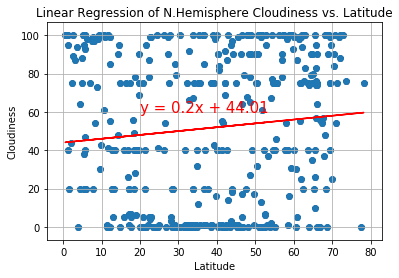

In [24]:
# Scatterplot of Cloudiness vs. Latitude.
plt.scatter(Northern_df['Latitude'], Northern_df['Cloudiness'], marker="p", facecolors="blue", edgecolors="black")

#Generate Regression equation

x_values= Northern_df["Latitude"]
y_values= Northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show regression equation

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")

# Format the plot with titles and labels
plt.title("Linear Regression of N.Hemisphere Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [25]:
Northern_df.columns

Index(['City', 'Country', 'Temperature', 'Latitude', 'Longitude', 'Max_Temp',
       'Cloudiness', 'Wind_Speed', 'Humidity'],
      dtype='object')

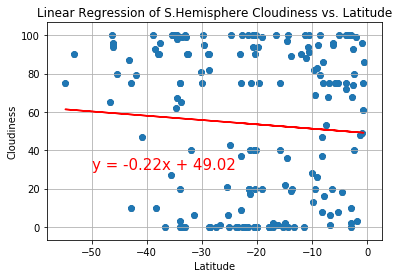

In [26]:
# Scatterplot of Cloudiness vs. Latitude.
plt.scatter(Southern_df['Latitude'], Southern_df['Cloudiness'], marker="p", facecolors="blue", edgecolors="black")

#Generate Regression equation

x_values= Southern_df["Latitude"]
y_values= Southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show regression equation

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Format the plot with titles and labels
plt.title("Linear Regression of S.Hemisphere Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

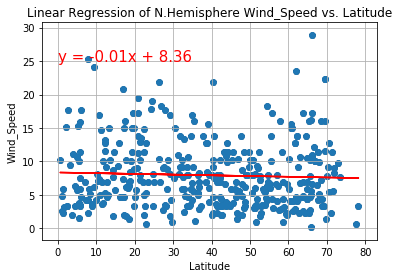

In [27]:
# Scatterplot of Wind_Speed vs. Latitude.
plt.scatter(Northern_df['Latitude'], Northern_df['Wind_Speed'], marker="p", facecolors="blue", edgecolors="black")

#Generate Regression equation

x_values= Northern_df["Latitude"]
y_values= Northern_df["Wind_Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show regression equation

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")

# Format the plot with titles and labels
plt.title("Linear Regression of N.Hemisphere Wind_Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

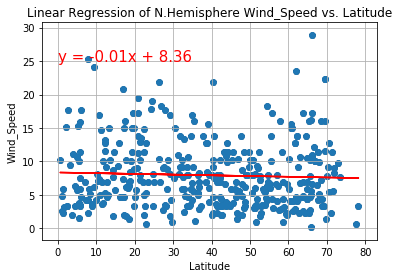

In [28]:
# Scatterplot of Wind_Speed vs. Latitude.
plt.scatter(Northern_df['Latitude'], Northern_df['Wind_Speed'], marker="p", facecolors="blue", edgecolors="black")

#Generate Regression equation

x_values= Northern_df["Latitude"]
y_values= Northern_df["Wind_Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Show regression equation

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")

# Format the plot with titles and labels
plt.title("Linear Regression of N.Hemisphere Wind_Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.grid(True)

# Save Figure
#plt.savefig("CityvsHumidity.png")

# Show Plot
plt.show()